### **本节介绍k-近邻算法（KNN）**

In [1]:
# 导入包
import matplotlib.font_manager
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import operator
import os

Ch_font = matplotlib.font_manager.FontProperties(fname = "E:/My_resources/Fonts/source-han-serif-1.001R/OTF/SimplifiedChinese/SourceHanSerifSC-Bold.otf")

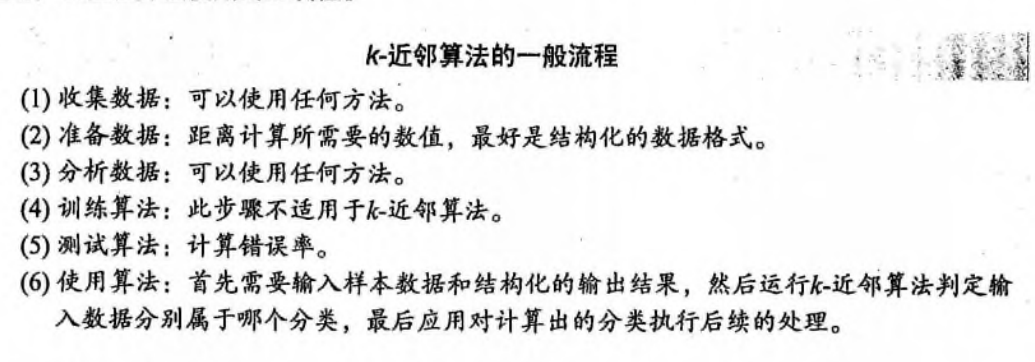

In [2]:
# 生成测试样本
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [9]:
# kNN实现一个简单的判断器
def classify0(inX, dataSet, labels, k):
    """inX 为输入的待判断数据"""
    # 计算距离（每个特征值都要）
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1) # 每个特征值距离累加
    distances = sqDistances**0.5 # 等于开根号

    # 距离排序
    sortedDistIndicies = distances.argsort()     

    # 计算前k近的出现最多频率的类别
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [4]:
test_group,test_label = createDataSet()
test = np.array([0,0])
print(classify0(test,test_group,test_label,3))

# 如预料，输出B

B


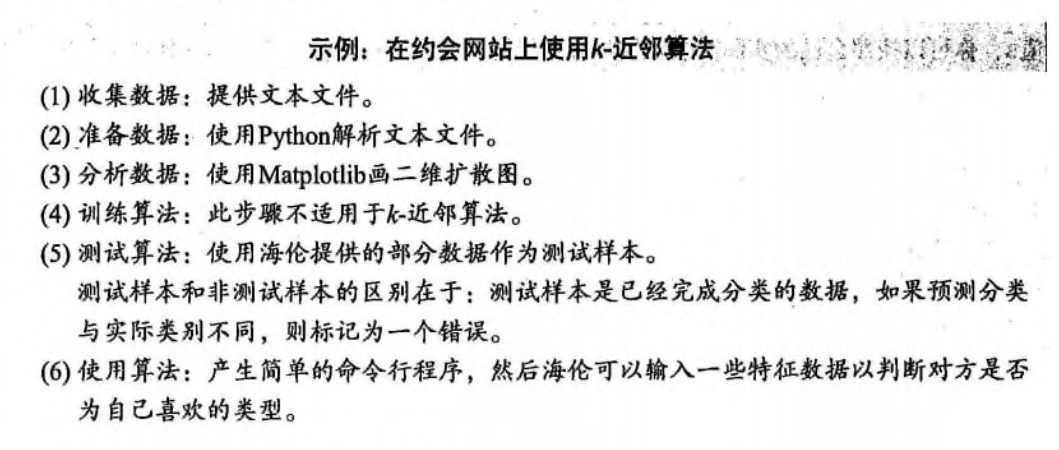

In [5]:
# 构建将文本数据转化为分类器可解释的格式（matrix）
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file，获取文本文件的行数
    returnMat = np.zeros((numberOfLines,3))        #prepare matrix to return，初始化返回的矩阵格式，行和特征值数量
    classLabelVector = []                       #prepare labels return   ，初始化返回标签
    fr = open(filename) # 重新打开文件
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t') # 以制表符分割
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1])) # 每行最后一个数据是标签
        index += 1
    return returnMat,classLabelVector

In [6]:
# 测试是否成功读入数据
dating_mat,dating_label = file2matrix("datingTestSet2.txt")
print(dating_mat)
print(dating_label)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

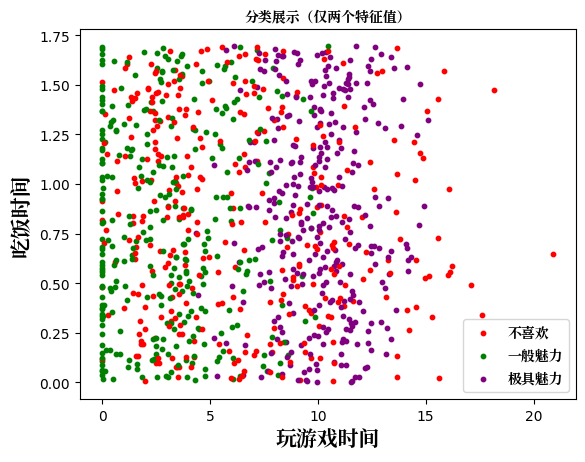

In [7]:
# 绘制两个特征值的散点图（二维距离观察）
for i in range(len(dating_mat)):
    if dating_label[i] == 1:
        s1 = plt.scatter(dating_mat[i,1],dating_mat[i,2],s = 10,color = 'red') # 也可以在这里label设置图例
    elif dating_label[i] == 2:
        s2 = plt.scatter(dating_mat[i,1],dating_mat[i,2],s = 10,color = 'green')
    elif dating_label[i] == 3:
        s3 = plt.scatter(dating_mat[i,1],dating_mat[i,2],s = 10,color = 'purple')

plt.title("分类展示（仅两个特征值）",fontsize = "xx-large",fontproperties = Ch_font)
plt.xlabel("玩游戏时间",fontsize = 15,fontproperties = Ch_font)
plt.ylabel("吃饭时间",fontsize = 15,fontproperties = Ch_font)
plt.legend((s1,s2,s3),('不喜欢','一般魅力','极具魅力'),loc = 'best',prop = Ch_font)
plt.show()

# x轴为第二个特征值，y轴为第三个特征值，距离为二维，可以拓展到高维
# 以不同标签下标进行颜色分类，发现有三种标签

# 发现以这两个特征值为分类依据无明显区分

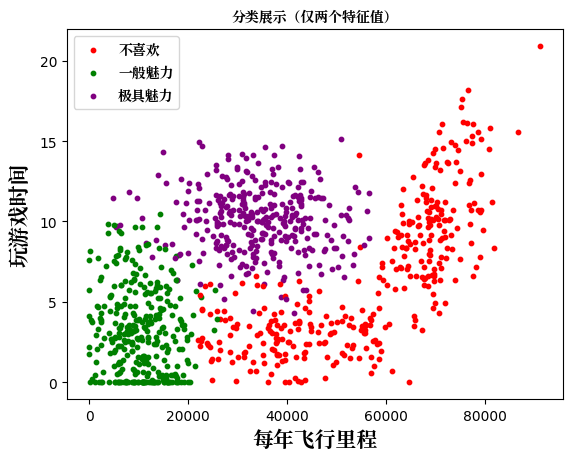

In [8]:
# 换两个特征值看看（其实是最好3个特征值用上，但是这个判断特征值与样本的相关性思想很重要）
# 以第一，第二个特征为分类特征值
for i in range(len(dating_mat)):
    if dating_label[i] == 1:
        s1 = plt.scatter(dating_mat[i,0],dating_mat[i,1],s = 10,color = 'red')
    elif dating_label[i] == 2:
        s2 = plt.scatter(dating_mat[i,0],dating_mat[i,1],s = 10,color = 'green')
    elif dating_label[i] == 3:
        s3 = plt.scatter(dating_mat[i,0],dating_mat[i,1],s = 10,color = 'purple')

plt.title("分类展示（仅两个特征值）",fontsize = "xx-large",fontproperties = Ch_font)
plt.xlabel("每年飞行里程",fontsize = 15,fontproperties = Ch_font)
plt.ylabel("玩游戏时间",fontsize = 15,fontproperties = Ch_font)
plt.legend((s1,s2,s3),('不喜欢','一般魅力','极具魅力'),loc = 'best',prop = Ch_font)
plt.show()

# 发现区分明显，可以以这两个特征值为分类依据

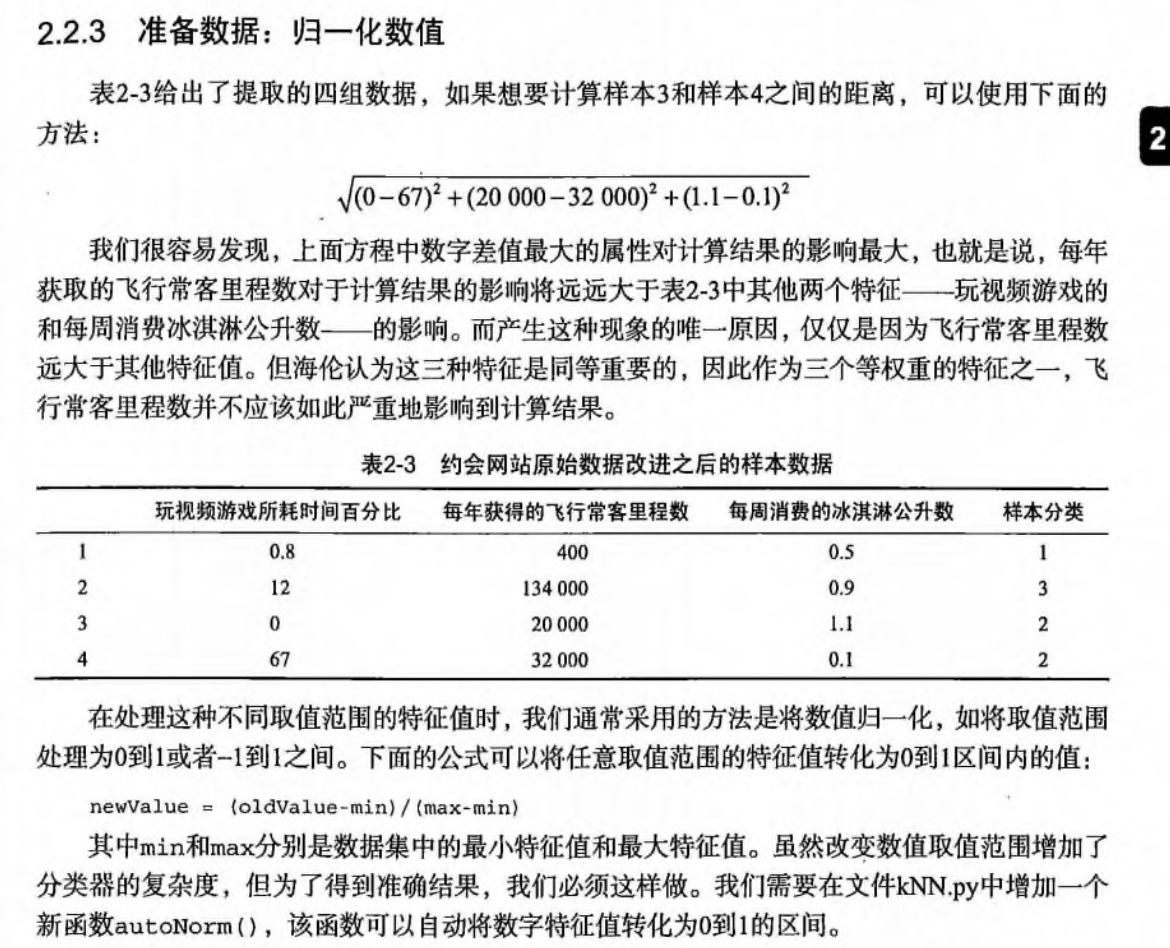

In [19]:
# 特征值归一化
def autoNorm(dataSet):
    minVals = dataSet.min(axis = 0) # 取列最小值
    maxVals = dataSet.max(axis = 0) # 取列最大值
    ranges = maxVals - minVals # 生成范围
    normDataSet = np.zeros(dataSet.shape)
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1)) # 现在其实numpy可以广播
    normDataSet = normDataSet/np.tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals

**下面对算法进行正确性测试**

In [20]:
# 计算错误率
def datingClassTest():
    hoRatio = 0.50      #hold out 50%，测试50%的数据
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data set from file，加载数据集
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [62]:
datingClassTest()

# 发现错误率很低，故可以当作实现对应软件功能的算法

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

**最后我们运用KNN算法构建完整的约会网站预测功能**

In [21]:
# 构建输入自己的数据，匹配最佳约会对象的好感度
def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentTats = float(input('percentage of time spent playing video games?'))
    ffMiles = float(input('frequent flier miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals =autoNorm(datingDataMat)
    inArr = np.array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr - minVals) / ranges,normMat,datingLabels,3)
    print('you will probably like this person:',resultList[classifierResult - 1])

In [22]:
classifyPerson()

you will probably like this person: in large doses


**下面利用KNN开发手写数字识别系统**

In [4]:
# 构建图像转化矩阵器
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [10]:
# 构建训练函数
def handwritingClassTest():
    hwLabels = []
    trainingFileList = os.listdir('digits/trainingDigits')           #load the training set，加载训练集，形成分类器
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('digits/trainingDigits/%s' % fileNameStr)
    
    testFileList = os.listdir('digits/testDigits')        #iterate through the test set，获取测试集
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [11]:
# 测试
handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe

**错误率极低，说明效果很好**